## Load fill and beam modes

In [1]:
import pytimber
import datetime
import pagestore
import time, calendar
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Retrieve data from database and start analysis

In [15]:
%matplotlib notebook
db=pagestore.PageStore('/home/nbiancac/HDD/Work/MD/LHC/DB/lhc.db','/home/nbiancac/HDD/Work/MD/LHC/DB/')
import LHC_BBQ, LHC_BCT, LHC_Energy, LHC_Coll, LHC_BQM, LHC_BSRT, LHC_FBCT, LHC_RP


# filln=5146
# ts1 = calendar.timegm(time.strptime("2016-07-31 19:20:00","%Y-%m-%d %H:%M:%S"))-2*3600
# ts2 = calendar.timegm(time.strptime("2016-07-31 19:40:00","%Y-%m-%d %H:%M:%S"))-2*3600

filln=5345

ts1 = calendar.timegm(time.strptime("2016-09-28 13:30:00","%Y-%m-%d %H:%M:%S"))-2*3600
ts2 = calendar.timegm(time.strptime("2016-09-28 13:35:00","%Y-%m-%d %H:%M:%S"))-2*3600


output_path='/home/nbiancac/HDD/Work/MD/LHC/'+str(filln)+'/'
os.system('mkdir -p '+output_path)
tag='instability'
beam=1

print datetime.datetime.fromtimestamp(ts1)
print datetime.datetime.fromtimestamp(ts2)

2016-09-28 13:30:00
2016-09-28 13:35:00


### BSRT

expanding 0.0%
calc. emitt. 0.0%
calc. emitt. 37.5%
calc. emitt. 74.9%
cleaning ...


<IPython.core.display.Javascript object>


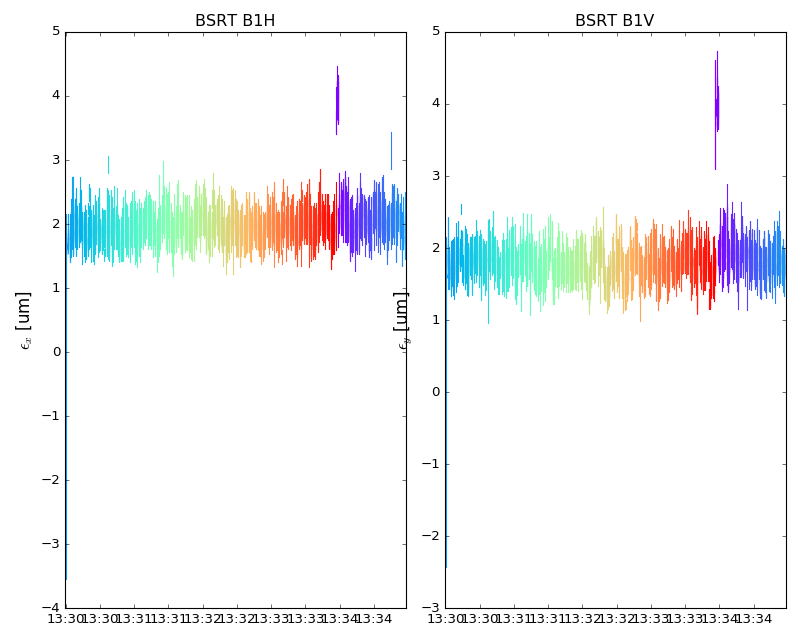

'/home/nbiancac/HDD/Work/MD/LHC/5345/instability_emit_B1.pdf'

In [13]:
##### Energy
data=db.get(LHC_Energy.variable_list(beams=[beam]),ts1,ts2)
Energy = LHC_Energy.energy(data, beam = beam)

data=db.get(LHC_BSRT.variable_list(beams=[beam]),ts1,ts2)

BSRT = LHC_BSRT.BSRT(data,beam)
BSRT.calculate_emittances(Energy, filln)
BSRT.get_bunches_effectively_recorded()

from cycler import cycler
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(BSRT.bunch_n))))


fig = plt.figure(figsize=(10,8))

p_vec=[]

for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    mask_bunch = np.where(BSRT.bunch_n==bunch_n)[0]
    
    plt.subplot(1,2,1)
#     BSRT.norm_emit_h[np.where(BSRT.sigma_h == 0.)]=np.NAN
#     BSRT.norm_emit_v[np.where(BSRT.sigma_v == 0.)]=np.NAN
    p, = plt.plot(BSRT.t_str[mask_bunch],BSRT.norm_emit_h[mask_bunch],'-',color = colors[ind])
    plt.subplot(1,2,2)
    p, = plt.plot(BSRT.t_str[mask_bunch],BSRT.norm_emit_v[mask_bunch],'-',color = colors[ind])
    p_vec.append(p)

plt.subplot(1,2,1)
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.tight_layout()
# plt.ylim(0,4)
plt.ylabel('$\epsilon_x$ [um]', fontsize =15)
plt.title('BSRT B%dH'%beam)

plt.subplot(1,2,2)
# lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1)    
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.tight_layout()
# plt.ylim(0,4)
plt.ylabel('$\epsilon_y$ [um]', fontsize =15)

plt.title('BSRT B%dV'%beam)

plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_emit_B'+str(beam)+'.pdf'


###  FBCT

<IPython.core.display.Javascript object>


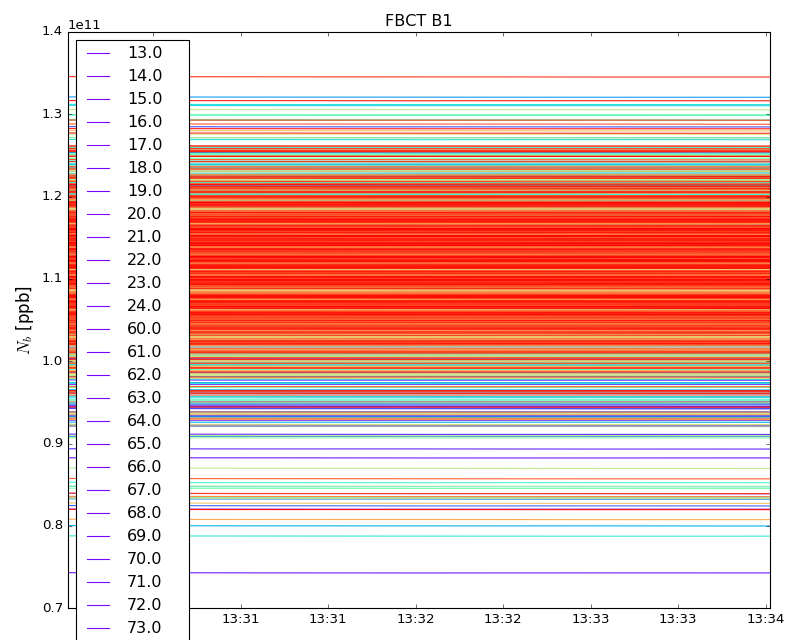

'/home/nbiancac/HDD/Work/MD/LHC/5345/instability_fbct_B1.pdf'

In [14]:
data=db.get(LHC_FBCT.variable_list(beams=[beam]),ts1,ts2)
FBCT = LHC_FBCT.FBCT(data, beam = beam)

fig = plt.figure(figsize=(10,8))

p_vec=[]

for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    p, = plt.plot( FBCT.t_str, FBCT.bint[:,int(bunch_n)],'-',color = colors[ind])
    
    p_vec.append(p)
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
# plt.ylim(0,5)
lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1, loc = 2)   
plt.ylabel('$N_b$ [ppb]', fontsize = 15)    
plt.title('FBCT B%d'%((beam)))

plt.tight_layout()

plt.savefig(output_path+tag+'_fbct_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_fbct_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_fbct_B'+str(beam)+'.pdf'


### BQM

In [ ]:
beamMode1 = 'INJPROT'
beamMode2 = 'BEAMDUMP'

ldb = pytimber.LoggingDB(source='ldb')

a =ldb.getLHCFillData(fill_number=filln)['beamModes']
for ind,el in enumerate(a):
    if el['mode'] == beamMode1:
        ts1_fill=ldb.getLHCFillData(fill_number=filln)['beamModes'][ind]['startTime']
        print beamMode1+' startTime: %.1f'%ts1

for ind,el in enumerate(a):
    if el['mode'] == beamMode2:
        ts2_fill=ldb.getLHCFillData(fill_number=filln)['beamModes'][ind]['startTime']
        print beamMode2+' startTime: %.1f'%ts2

        
# data = ldb.get(LHC_BQM.variable_list(beams=[beam]),ts1_fill,ts2_fill)

# db=pagestore.PageStore('/home/nbiancac/HDD/Work/MD/LHC/DB/lhc.db','/home/nbiancac/HDD/Work/MD/LHC/DB/')
# db.store(data)

In [ ]:
data = db.get(LHC_BQM.variable_list(beams=[beam]),ts1_fill,ts2_fill)
bl = LHC_BQM.blength(data, None, beam = beam)

fig = plt.figure(figsize=(10,8))

p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)[0:10]):
    p, = plt.plot( bl.t_str, (bl.blen[:,int(bunch_n)])*1e9,'-',color = colors[ind])
    p_vec.append(p)

hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
# plt.ylim(0,5)
lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1, loc = 2)   
plt.ylabel('$\\tau_b$ [ns]', fontsize = 15)    
plt.title('BQM B%d'%((beam)))

plt.tight_layout()
plt.ylim(0.75, 1.25)

plt.savefig(output_path+tag+'_bl_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_bl_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_bl_B'+str(beam)+'.pdf'

In [ ]:
# Octupole
mdb=pytimber.LoggingDB(source = 'mdb')
data=mdb.get('RPMBB%ROF.A81B'+str(beam)+':I_MEAS',ts1,ts2)
db.store(data)

data=db.get('RPMBB%ROF.A81B'+str(beam)+':I_MEAS',ts1,ts2)
tt, vv = data['RPMBB.RR13.ROF.A81B'+str(beam)+':I_MEAS']

oct_time_str=[datetime.datetime.fromtimestamp(tt[ii]) for ii in np.arange(len(tt))]

N=50

plt.figure()
ax1 = plt.subplot(111)
h0, = plt.plot(oct_time_str, vv, "-b")
plt.xlabel("Time")
plt.ylabel("$I_{oct}$  [A]")
plt.title('B%d'%(beam))
plt.ylim(0,570)

xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

plt.savefig(output_path+tag+'_oct_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_oct_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_oct_B'+str(beam)+'.pdf'

### Normalized plots

In [ ]:
N=50

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(10,10), gridspec_kw = {'width_ratios':[3, 1]})
p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    p, = ax1.plot( FBCT.t_str, FBCT.bint[:,int(bunch_n)]/FBCT.bint[:,int(bunch_n)][0],'-',color = colors[ind])
    p_vec.append(p)
    
ax1.set_ylabel("$N_{b}/N_b^0$")
ax1.set_title('B%d'%(beam))
# ax1.set_ylim(0,2)
xlim0 = ax1.get_xlim()

xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

lgd = ax1.legend(p_vec, np.unique(BSRT.bunch_n)+1, bbox_to_anchor  = (1.3, 1.1))   


p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)[0:10]):
    mask_bunch = np.where(BSRT.bunch_n==bunch_n)[0]
    bh = BSRT.norm_emit_h[mask_bunch]
    p, = ax2.plot(BSRT.t_str[mask_bunch],bh/np.nanmean(bh[0:N]),'-',color = colors[ind])
    p_vec.append(p)

ax2.set_ylabel("$\\epsilon_{x}/\\epsilon_x^0$")
# ax2.set_ylim(0,4)

p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)[0:10]):
    mask_bunch = np.where(BSRT.bunch_n==bunch_n)[0]
    bv = BSRT.norm_emit_v[mask_bunch]
    p, = ax3.plot(BSRT.t_str[mask_bunch],bv/np.nanmean(bv[0:N]),'-',color = colors[ind])
    p_vec.append(p)

ax3.set_ylabel("$\\epsilon_{y}/\\epsilon_y^0$")
# ax3.set_ylim(0,4)



p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)[0:10]):
    
    index= np.argmin(np.abs(bl.t_stamps-FBCT.t_stamps[0]))
    bl0 = bl.blen[index,int(bunch_n)]
    p, = ax4.plot( bl.t_str, bl.blen[:,int(bunch_n)]/bl0,'-',color = colors[ind])
    p_vec.append(p)


ax4.set_ylabel("$\\tau_{b}/\\tau_b^0$")
ax4.set_ylim(0,2)
ax4.set_xlabel("Time")
ax4.set_xlim(xlim0)

# plt.tight_layout()
xfmt = mpl.dates.DateFormatter('%H:%M')
ax4.xaxis.set_major_formatter(xfmt)


plt.savefig(output_path+tag+'_all_normalized_B'+str(beam)+'.pdf', transparent=True, bbox_estra_artists=(lgd,), bbox_inches = 'tight')
plt.savefig(output_path+tag+'_all_normalized_B'+str(beam)+'.png', transparent=True, bbox_estra_artists=(lgd,), bbox_inches = 'tight')
output_path+tag+'_all_normalized_B'+str(beam)+'.pdf'

### BBQ Spectrogram

In [ ]:
from scipy import signal


# RAW BBQ
data=db.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
BBQ_RAW=LHC_BBQ.BBQHS_RAW(data,beam=beam)
del(data)

#specgram
f, t, Sxx = signal.spectrogram(BBQ_RAW.h, fs = 1, nperseg = 2048, noverlap=0)

plt.figure(figsize=(12,8))
ax1 = plt.subplot(121)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Sxx)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d H BBQ-FFT '%BBQ_RAW.beam, y = 1.08)

plt.xlim(0.28, 0.32)

# # with collimators
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['L','R']
namecoll = 'TCP.D6'+typecoll[beam-1]+'7.B'+str(beam)
Coll.select_coll(namecoll+':MEAS_LVDT_GU')
ax2 = ax1.twiny()
p, = ax2.plot(Coll.values, Coll.t_str,"-k")
ax2.set_ylim(Coll.t_str[0], Coll.t_str[-1])


# with RP

# data=db.get(LHC_RP.variable_list(beam),ts1,ts2)
# RP=LHC_RP.RP(data,beam=beam)
# typecoll=['R','L']
# if beam ==2:
#     namecoll = 'XRPH.B6'+typecoll[beam-1]+'5.B'+str(beam)
# else:
#     namecoll = 'XRPV.B6'+typecoll[beam-1]+'5.B'+str(beam)
    
# RP.select_coll(namecoll+':MEAS_LVDT_LU')
# ax2 = ax1.twiny()
# p, = ax2.plot(RP.values, RP.t_str,"-k")
# ax2.set_ylim(RP.t_str[0], RP.t_str[-1])


ax2.legend([p] , [namecoll], loc = 3)
f, t, Syy = signal.spectrogram(BBQ_RAW.v, fs = 1, nperseg = 2048, noverlap=0)

ax1 = plt.subplot(122)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Syy)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d V BBQ-FFT '%BBQ_RAW.beam, y =1.08)

plt.xlim(0.28, 0.32)


# # with collimators
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['L','R']
namecoll = 'TCP.D6'+typecoll[beam-1]+'7.B'+str(beam)
Coll.select_coll(namecoll+':MEAS_LVDT_GU')
ax2 = ax1.twiny()
ax2.plot(Coll.values, Coll.t_str,"-k")
ax2.set_ylim(Coll.t_str[0], Coll.t_str[-1])


# plt.tight_layout()
del(Sxx,Syy)

plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_specgram_B'+str(beam)+'.pdf'

### Sussix

In [ ]:
import PySussix as ps

# Sussix settings
nt1=1; nt2=2048;
nharm = 15

tunex0 = 0.27
tuney0 = 0.295
ex0 = 1e-3
ey0 = 1e-3

tuney_vec=[];tunex_vec=[];
spec_ox=[]; spec_oy=[];
spec_ax=[]; spec_ay=[];
spec_t=[];

for ii in np.arange(0, len(BBQ_RAW.v)):
    
    datax=BBQ_RAW.h[ii][nt1:nt2]-np.mean(BBQ_RAW.h[ii][nt1:nt2])
    datay=BBQ_RAW.v[ii][nt1:nt2]-np.mean(BBQ_RAW.v[ii][nt1:nt2])
    spec=ps.Sussix()
    spec.sussix_inp(nt1=nt1,nt2=nt2,tunex=tunex0,tuney=tuney0,ex=ex0,ey=ey0,ir=1,nharm=nharm)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    

    
    spec.ox=np.abs(spec.ox)
    spec.oy=np.abs(spec.oy)
    
    spec_ox.append(spec.ox[0:nharm-1])
    spec_oy.append(spec.oy[0:nharm-1])
    spec_ax.append(spec.ax[0:nharm-1])
    spec_ay.append(spec.ay[0:nharm-1])
    spec_t.append(BBQ_RAW.t_stamps[ii]*(1+np.random.randn(1,nharm-1)*1e-12))
    
    del(datax,datay)

In [ ]:
[tunex_min, tunex_max] = np.sort([0.28 , 0.32])
[tuney_min, tuney_max] = np.sort([0.28 , 0.32])

rangex=np.array([tunex_min, tunex_max])
rangey=np.array([tuney_min, tuney_max])

tuney_vec=[]; ay_vec=[]

for ii,index in enumerate((np.abs(spec_oy) < rangey.max()) & (np.abs(spec_oy) > rangey.min())):
    spec.oy = np.squeeze(spec_oy[ii])[index]
    spec.ay = np.squeeze(spec_ay[ii])[index]
    
    if len(spec.ay):
        tuney=spec.oy[spec.ay.argmax()]
        ay=spec.ay[spec.ay.argmax()]
    else:
        tuney=np.NaN
        ay=np.NaN
    tuney_vec.append(tuney)
    ay_vec.append(ay)

BBQ_RAW.qv=np.array(tuney_vec)
BBQ_RAW.av=np.array(ay_vec)

tunex_vec=[]; ax_vec=[]

for ii,index in enumerate((np.abs(spec_ox) < rangex.max()) & (np.abs(spec_ox) > rangex.min())):
    spec.ox = np.squeeze(spec_ox[ii])[index]
    spec.ax = np.squeeze(spec_ax[ii])[index]
    
    if len(spec.ax):
        tunex=spec.ox[spec.ax.argmax()]
        ax=spec.ax[spec.ax.argmax()]
    else:
        tunex=np.NaN
        ax=np.NaN
    tunex_vec.append(tunex)
    ax_vec.append(ax)
    
    
BBQ_RAW.qh=np.array(tunex_vec)
BBQ_RAW.ah=np.array(ax_vec)

t_stamp = np.squeeze(np.reshape(np.asarray(spec_t),(1,-1)))
t_str =np.array(map(datetime.datetime.fromtimestamp, t_stamp))

In [ ]:
samples = np.linspace(0,len(spec_t)-1,10,dtype=int)
colors = cm.rainbow(np.linspace(0, 1, len(samples)))
tune_lims = (0.30,0.33)

plt.figure(figsize=(12,12))

#qx
ax1 = plt.subplot(3,2,1)
plt.plot(t_str,np.squeeze(np.reshape(np.asarray(spec_ox),(1,-1))),'ok',alpha=0.2,markerfacecolor='k', markersize=2)
plt.plot(BBQ_RAW.t_str,BBQ_RAW.qh,'or',alpha=0.2,markerfacecolor='r', markersize=4)
plt.ylabel('Qx')
plt.vlines(np.array(BBQ_RAW.t_str)[samples], 0, 0.5, colors=colors)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.ylim(tune_lims)
plt.title('B%dH'%beam)

#qy
ax2 = plt.subplot(3,2,2)
plt.plot(t_str,np.squeeze(np.reshape(np.asarray(spec_oy),(1,-1))),'ok',alpha=0.2,markerfacecolor='k', markersize=2)
plt.plot(BBQ_RAW.t_str,BBQ_RAW.qv,'or',alpha=0.2,markerfacecolor='r', markersize=4)
plt.ylabel('Qy')
plt.vlines(np.array(BBQ_RAW.t_str)[samples], 0, 0.5, colors=colors)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.ylim(tune_lims)
plt.title('B%dV'%beam)

# plot amplitude of selected line
ax3 = plt.subplot(3,2,3,  sharex=ax1)
ax3.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'-r',markeredgecolor='r')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax3.xaxis.set_major_formatter(xfmt)
plt.ylabel('Log max amp [arb. units]')
plt.ylim(0,max(BBQ_RAW.av)+max(BBQ_RAW.ah))

# plot amplitude of selected line
ax4 = plt.subplot(3,2,4,  sharex=ax2)
ax4.plot(BBQ_RAW.t_str,BBQ_RAW.av,'-r',markeredgecolor='r')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax4.xaxis.set_major_formatter(xfmt)
plt.ylabel('Log max amp [arb. units]')
plt.ylim(0,max(BBQ_RAW.av)+max(BBQ_RAW.ah))

ax5 = plt.subplot(3,2,5)


for iind, ind in enumerate(samples):
    plt.bar(np.sort(np.array(spec_ox[ind])), np.array(spec_ax[ind])[np.array(spec_ox[ind]).argsort()],
            width = 1e-5, color = colors[iind], edgecolor = colors[iind])

ax5.set_xlim(tune_lims)
ax5.set_yscale('log')


ax6 = plt.subplot(3,2,6)


for iind, ind in enumerate(samples):
    plt.bar(np.sort(np.array(spec_oy[ind])), np.array(spec_ay[ind])[np.array(spec_oy[ind]).argsort()],
            width = 1e-5, color = colors[iind], edgecolor = colors[iind])

ax6.set_xlim(tune_lims)
ax6.set_yscale('log')

plt.tight_layout()

plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_sussix_B'+str(beam)+'.pdf'

In [ ]:
if beam == 2:
    fit_ts1 = calendar.timegm(time.strptime("2016-09-07 20:21:30","%Y-%m-%d %H:%M:%S"))-2*3600
    fit_ts2 = calendar.timegm(time.strptime("2016-09-07 20:22:30","%Y-%m-%d %H:%M:%S"))-2*3600
else:
    fit_ts1 = calendar.timegm(time.strptime("2016-09-07 20:16:50","%Y-%m-%d %H:%M:%S"))-2*3600
    fit_ts2 = calendar.timegm(time.strptime("2016-09-07 20:17:10","%Y-%m-%d %H:%M:%S"))-2*3600

    
fit_select = np.where((BBQ_RAW.t_stamps > fit_ts1)&(BBQ_RAW.t_stamps < fit_ts2))

fit_time_stamps = BBQ_RAW.t_stamps[fit_select]
fit_ay = BBQ_RAW.ah[fit_select]

fit_select=np.where(~np.isnan(fit_ay))
fit_time_stamps = fit_time_stamps[fit_select]
fit_ay = fit_ay[fit_select]


p = np.polyfit(fit_time_stamps, np.log(fit_ay), 1)


fit_exp = np.exp(fit_time_stamps*p[0]+p[1])
fit_t_str=[datetime.datetime.fromtimestamp(fit_time_stamps[ii]) for ii in np.arange(len(fit_time_stamps))]

plt.figure()
ax1 =plt.subplot(221)
ax1.plot(fit_t_str, np.log(fit_ay),'-r')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.title('B%dH'%beam)

ax1 =plt.subplot(223)

ax1.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'-k',markeredgecolor='k')
plt.plot(fit_t_str, fit_exp,'-r',linewidth=3)
plt.ylim(0, max(fit_exp)*2)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.tight_layout()
# plt.xlim(fit_ts1, fit_ts2)
t = plt.annotate(r'$\tau$ = %.1fs'%(1./p[0]),xy=(fit_t_str[20], 0.8*fit_ay.max()), size = 20)
t.set_bbox(dict(color='w', alpha=0.5, edgecolor='w'))



#v plane
fit_select = np.where((BBQ_RAW.t_stamps > fit_ts1)&(BBQ_RAW.t_stamps < fit_ts2))
fit_time_stamps = BBQ_RAW.t_stamps[fit_select]
fit_ay = BBQ_RAW.av[fit_select]

fit_select=np.where(~np.isnan(fit_ay))
fit_time_stamps = fit_time_stamps[fit_select]
fit_ay = fit_ay[fit_select]


p = np.polyfit(fit_time_stamps, np.log(fit_ay), 1)


fit_exp = np.exp(fit_time_stamps*p[0]+p[1])
fit_t_str=[datetime.datetime.fromtimestamp(fit_time_stamps[ii]) for ii in np.arange(len(fit_time_stamps))]

ax1 =plt.subplot(222)
ax1.plot(fit_t_str, np.log(fit_ay),'-r')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.title('B%dV'%beam)

ax1 =plt.subplot(224)

ax1.plot(BBQ_RAW.t_str, BBQ_RAW.av,'-k',markeredgecolor='k')
plt.plot(fit_t_str, fit_exp,'-r',linewidth=3)
plt.ylim(0, max(fit_exp)*2)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.tight_layout()
# plt.xlim(fit_ts1, fit_ts2)
t = plt.annotate(r'$\tau$ = %.1fs'%(1./p[0]),xy=(fit_t_str[20], 0.8*fit_ay.max()), size = 20)
t.set_bbox(dict(color='w', alpha=0.5, edgecolor='w'))

plt.tight_layout()

plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_risetime_B'+str(beam)+'.pdf'

In [ ]:
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_risetime_B'+str(beam)+'.pdf'